##### Contents:
###### 1. Import Libraries
###### 2. Import ords_prods_customers_merged dataframe
###### 3. Create a histogram of the “order_hour_of_day” column
###### 4. Create a bar chart from the “loyalty_flag” column
###### 5. Check if spending behaviour varies by time of day
###### 6. Check connection between age and family situation
###### 7. Check connection between age and income
###### 8. Export visualizations

##### 1. Import Libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'C:\Users\Daniella\ACH4 - Instacart Basket Analysis'

##### 2. Import ords_prods_customers_merged dataframe:

In [11]:
ords_prods_customers_merged = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', '4.9.1 - ords_prods_customers_merged.pkl'))

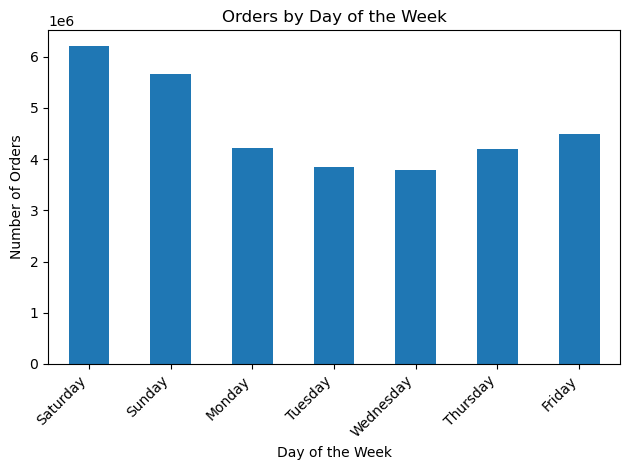

In [46]:
bar_dow = ords_prods_customers_merged['orders_day_of_the_week'].value_counts().sort_index().plot.bar()
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(7), labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

##### 3. Create a histogram of the “order_hour_of_day” column

Text(0, 0.5, 'Frequency')

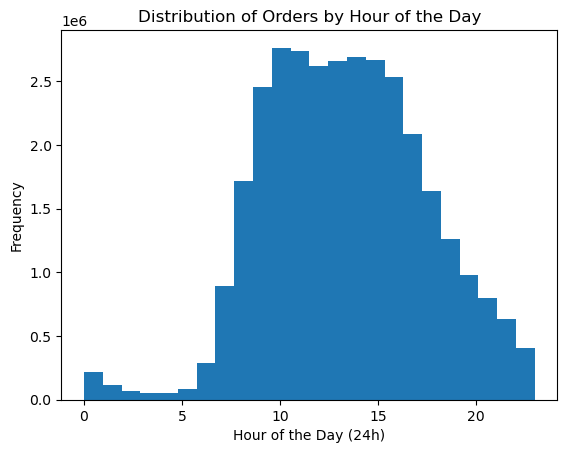

In [21]:
hist = ords_prods_customers_merged['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Distribution of Orders by Hour of the Day')
plt.xlabel('Hour of the Day (24h)')
plt.ylabel('Frequency')

##### Answer: I divided the histogram into 24 bins, one for each hour of the day. From the histogram we can see that customers prefer to buy during the morning hours, reaching a peack close to the 10:00 AM mark. After that we see a drop at around 16:00 that continues through the night time.

##### 4. Create a bar chart from the “loyalty_flag” column.

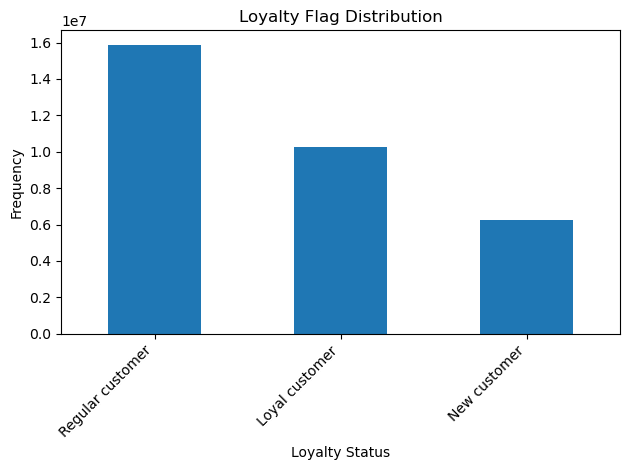

In [31]:
bar = ords_prods_customers_merged['loyalty_flag'].value_counts().plot.bar()
plt.title('Loyalty Flag Distribution')
plt.xlabel('Loyalty Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

##### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [56]:
# Create a subset of the first 2 million rows:
df_sample = ords_prods_customers_merged[:1000000]

In [58]:
np.random.seed(4)

In [60]:
# Create a list holding true/false values to the test np.random.rant() <- 0.7
dev = np.random.rand(len(ords_prods_customers_merged)) <= 0.7

In [62]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [64]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [66]:
# Store 70% of the sample in the dataframe big
big = ords_prods_customers_merged[dev]

In [70]:
# Store 30% of the sample in the dataframe small
small = ords_prods_customers_merged[~dev]

In [59]:
# Check number of rows in entire dataframe:
len(ords_prods_customers_merged)

32404859

In [72]:
# Check number of rows in samples:
len(big) + len(small)

32404859

In [74]:
# Reduce samples to prices + order_hour_of_day:
df_2 = small[['order_hour_of_day','prices']]

In [76]:
df_2

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0
...,...,...
32404841,12,3.8
32404842,12,5.9
32404843,12,3.7
32404849,12,3.2


Text(0.5, 1.0, 'Spending by hours of the day')

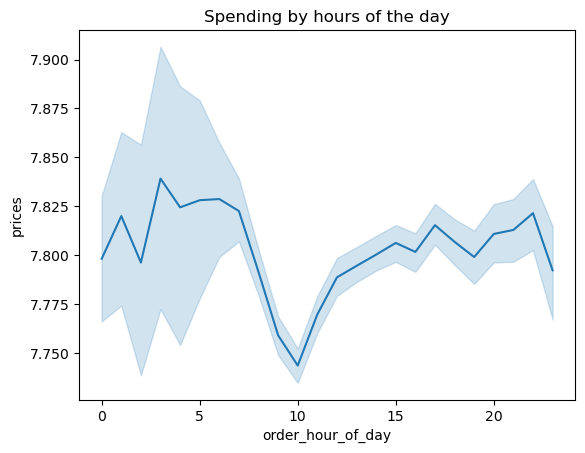

In [78]:
# Create the line chart:
line_chart = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Spending by hours of the day')

##### 6. Determine whether there’s a connection between age and family situation

In [84]:
# Reduce samples to Age + Nº of dependants:
df_3 = small[['Age','Nº of dependants']]

In [86]:
df_3

,Age,Nº of dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,74,3
32404842,74,3
32404843,74,3
32404849,74,3


##### Answer: There's no clear connection between age and number of dependents.

##### Creating a line chart exploring the connections between age and number of dependents:

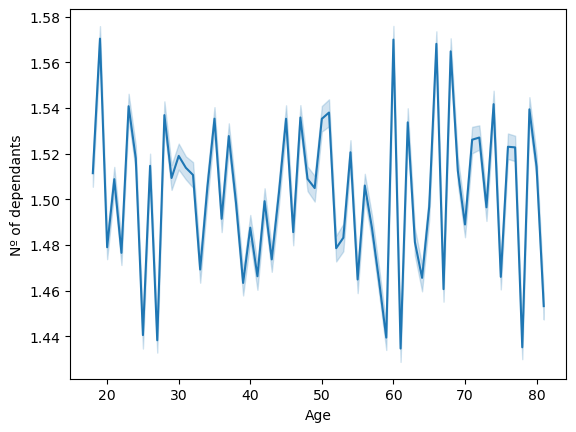

In [95]:
# Create line chart:
line_chart2 = sns.lineplot(data = df_3, x = 'Age',y = 'Nº of dependants')

##### 7. Determine whether there’s a connection between age and income:

In [100]:
# Reduce samples to Age + income:
df_4 = small[['Age','income']]

In [102]:
df_4

,Age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423
...,...,...
32404841,74,137969
32404842,74,137969
32404843,74,137969
32404849,74,137969


##### Creating a scatterplot to visualize the connections between age and income:

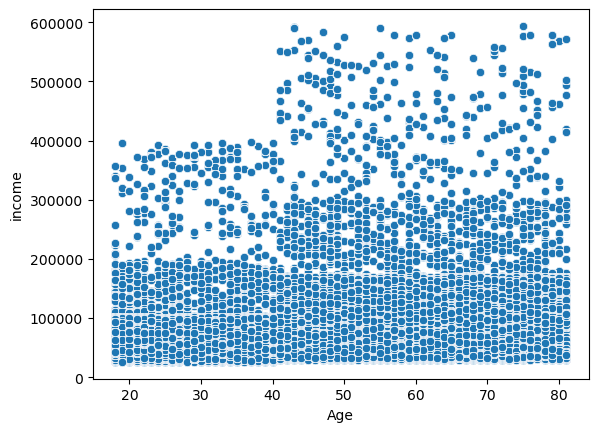

In [132]:
# Create scatterplot:
scatterplot = sns.scatterplot(data = df_4, x = 'Age', y = 'income')

##### Answer: The scatterplot shows a pattern where the income varies as age increases. The plot may suggests that younger people tend to have lower incomes while older individuals have a wider range of income levels some of them reaching the 600k mark.

##### 8. Export visualizations

In [52]:
# Export bar chart of the “order_day_of_week” column
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_day_of_week.png'))

In [23]:
# Export histogram of the “order_hour_of_day” column
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day(24).png'))

In [33]:
# Export bar chart from the “loyalty_flag” column:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag.png'))

In [80]:
# Export line chart for connection between prices and hour of the day:
line_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day.png'))

In [126]:
# Export line chart for connection between Age and Nº of dependants:
line_chart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_and_Nº_dependents.png'))

In [143]:
# Export scatterplot for connection between Age and income:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_and_income.png'))